# **Milano Laureati 2017**

Lo scopo ultimo di questa analisi non ha nessuno scopo commerciale nè statistico, ma solo di esercitazione per il consolidamento delle capacità acquisite in queste settimane. 

Il particolare, come: 

- importare le librerie necessarie per l'analisi;
- effettuare la connessione con un database;
- ricavare i dati attraverso query SQL;
- manipolare i dati attraverso funzioni e algoritmi in Python;
- mostrare i risultati attraverso grafici e tabelle.

e ha l'obiettivo di analizzare l'andamento degli studenti laureati presso gli atenei milanesi nel 2017.

Essendo il mio primo "Jupyter Notebook", in alcune parti il codice risulterà essere molto "macchinoso" e poco ottimizzato, quindi mi scuso in anticipo per questo e cercherò di migliorare nelle prossime analisi.

I database che vengono utilizzati in questa esercitazione sono stati presi dal sito del Comune di Milano (http://dati.comune.milano.it) in formato .csv.

Lo studio parte dall'analisi globale dei dati in base a:

- **Tipologia di laurea:** per evidenziare le percentuali di studenti laureati per tipologia di corso di laurea (esempio: magistrale, triennale oppure ciclo unico);
- **Tipologia di Ateneo:** per evidenziare le percentuali di studenti laureati in un determinato ateneo (esempio: Politecnico, Cattolica, Bicocca, ecc..)
- **Tipologia di classe di studi:** per evidenziare le percentuali di studenti laureati in una determinata classe di studi (esempio: Ingegneria, Architettura, ecc...)

dove il numero di "categorie" risulta essere elevato, lo studio si soffermerà solo sulle principali 5 categorie (che in tutta l'esercitazione prenderanno il nome di "Top 5"). Quindi le percentuali verranno calcolate sia rispetto al globale di laureati nel 2017 che rispetto al parziale (ovvero calcolate rispetto al totale delle prime 5 categorie).

L'esercitazione proseguirà analizzando poi la percentuale di laureati per genere (femmina, maschio), in particolare soffermandosi sulle prime 5 scelte effettuate dagli studenti, sia in termini di classe di studi che in termini di ateneo.

Quindi si cocluderà con l'analisi degli studenti stranieri in base al numero di laureati per nazionalità e in base alle prime scelte per ateneo.

Al fondo, nelle voce "Conclusioni" verranno riportate le mie considerazioni (che riultano essere prettamente personali!) sulla base dei risultati ottenuti.

Con questo vi auguro una buona lettura!

PS: rimango disponibile per eventuali dubbi, delucidazioni o consigli di miglioramento.

### Importare tutte le librerie necessarie per l'analisi

In [71]:
#importare librerie
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import numpy as np
import ibm_db_dbi
import ibm_db

#!pip install --user ipython-sql
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Aggiungere tutte le credenziali necessarie per connettersi al batabase Db2

In [74]:
#Credential

dsn_hostname:"HOSTNAME andress" # e.i dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net
dsn_database:"Database Name" #e.i BLUDB
dsn_uid:"User ID"
dsn_pwd:"Password ID"
dsn_protocol:"Protocollo di comuzione" #e.i TCPIP
dsn_port:"porta" #e.i 5000
dsn_driver:"Nome per driver"

conn =%sql ibm_db_sa:'connessione'

conn

### Stampare a videata i 3 database

Di seguito si riportano le prime righe dei 3 database oggetto di indagine. Essi sono:

1. 'MILANO_LAUREATI_ATENEO'
2. 'MILANO_LAUREATI_GENERE'
3. 'MILANO_LAUREATI_NAZIONE'

In [3]:
# MILANO_LAUREATI_ATENEO

ATENEO = %sql select * from MILANO_LAUREATI_ATENEO
ATENEO.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,Anno_solare,codice_ateneo,nome_ateneo,tipologia_corso,CLASSE__numero_,classe,Nome_Corso,laureati_totale
0,2017,1509,Milano Bicocca,Laurea Magistrale (dm 270/04),LM-1,Antropologia culturale ed etnologia,Scienze Antropologiche ed Etnologiche,43
1,2017,1501,Milano,Laurea Magistrale (dm 270/04),LM-2,Archeologia,Archeologia,24
2,2017,1504,Milano Cattolica,Laurea Magistrale (dm 270/04),LM-2,Archeologia,Archeologia e Storia dell'Arte,54
3,2017,1502,Milano Politecnico,Laurea Magistrale (dm 270/04),LM-4,Architettura e ingegneria edile-architettura,Architectural Design And History - Progettazio...,27
4,2017,1502,Milano Politecnico,Laurea Magistrale (dm 270/04),LM-4,Architettura e ingegneria edile-architettura,Architettura,671
5,2017,1502,Milano Politecnico,Laurea Magistrale (dm 270/04),LM-4,Architettura e ingegneria edile-architettura,Architettura - Progettazione Architettonica,336
6,2017,1502,Milano Politecnico,Laurea Magistrale (dm 270/04),LM-4,Architettura e ingegneria edile-architettura,Architettura-Architettura delle Costruzioni,85
7,2017,1502,Milano Politecnico,Laurea Magistrale (dm 270/04),LM-4,Architettura e ingegneria edile-architettura,Sustainable Architecture And Landscape Design ...,37
8,2017,1502,Milano Politecnico,Laurea Magistrale Ciclo Unico (dm 270/04),LM-4 C.U.,Architettura e ingegneria edile-architettura (...,Ingegneria Edile-Architettura,99
9,2017,1501,Milano,Laurea (dm 270/04),L-1,Beni culturali,Scienze dei Beni Culturali,384


In [4]:
#MILANO_LAUREATI_GENERE

GENERE= %sql select * from MILANO_LAUREATI_GENERE
GENERE.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,Anno_solare,codice_ateneo,nome_ateneo,CLASSE__numero_,classe,sesso,laureati_totale
0,2017,1509,Milano Bicocca,LM-1,Antropologia culturale ed etnologia,M,8
1,2017,1509,Milano Bicocca,LM-1,Antropologia culturale ed etnologia,F,35
2,2017,1504,Milano Cattolica,LM-2,Archeologia,F,45
3,2017,1501,Milano,LM-2,Archeologia,M,5
4,2017,1501,Milano,LM-2,Archeologia,F,19
5,2017,1504,Milano Cattolica,LM-2,Archeologia,M,9
6,2017,1502,Milano Politecnico,LM-4,Architettura e ingegneria edile-architettura,F,706
7,2017,1502,Milano Politecnico,LM-4,Architettura e ingegneria edile-architettura,M,450
8,2017,1502,Milano Politecnico,LM-4 C.U.,Architettura e ingegneria edile-architettura (...,F,39
9,2017,1502,Milano Politecnico,LM-4 C.U.,Architettura e ingegneria edile-architettura (...,M,60


In [5]:
#MILANO_LAUREATI_NAZIONE
NAZIONE= %sql select * from MILANO_LAUREATI_NAZIONE
NAZIONE.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,Anno_solare_CODICE_ATENEO_NOME_ATENEO_CITTADINANZA_LAUREATI_STRANIERI,Column_1,nome_ateneo,cittadinanza,laureati_stranieri
0,2017,1501,Milano,ALBANIA,64
1,2017,1501,Milano,ALGERIA,1
2,2017,1501,Milano,BELARUS,7
3,2017,1501,Milano,BELGIUM,1
4,2017,1501,Milano,BOLIVIA,1
5,2017,1501,Milano,BOSNIA AND HERZEGOVINA,5
6,2017,1501,Milano,BRAZIL,6
7,2017,1501,Milano,BULGARIA,11
8,2017,1501,Milano,CAMEROON,5
9,2017,1501,Milano,CHINA,84


### Calcolo del totale di laureati nel 2017

Il primo step della mia analisi si basa sul calcolo totale degli studenti laureati presso gli atenei milanesi durante tutto l'anno 2017. Tale valore sarà utilizzato in tutte le mie successive osservazioni.

Di seguito ho riportato due metodi alternativi per ottenere il valore totale di laureati, "Tot_laureati":

- 1° Metodo: Ottenere il valore come risultato di una query SQL

- 2° Metodo: Ottenere il valore come risultato di un ciclo for in Python

entrambe i metodi si ottengono per manipolazione di un dataframe.

In [6]:
#Il totale dei laureati nel 2017

# 1° Metodo per ottenere il totale dei laureati nel 2017
Tot_laureati = %sql select sum(laureati_totale) as Totale_laureati_2017 from MILANO_LAUREATI_ATENEO

Tot_laureati.DataFrame()

# 2° Metodo per ottenere il totale dei laureati nel 2017

len2=len(ATENEO)
C=[]
for i in range(len2):
    C.append(ATENEO[i][7])

Tot_laureati = sum(C)
print('Il totale dei laureati nel 2017 è di:',Tot_laureati,'\n')

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
Il totale dei laureati nel 2017 è di: 45419 



come si può osservare, il totale dei laureati nel 2017 è di **45.419** studenti. 

### Analisi del numero di laureati in funzione della *Tipologia di laurea*, *Tipologia di Ateneo*, *Tipologia di classe di studi*

Di seguito, mi sono concentrata sull'evidenziare le principali categorie di appartenenza dei laureati. In particolare, mi sono focalizzata sulla:

- **Tipologia di laurea**: per evidenziare le percentuali di studenti laureati per tipologia di corso di laurea (esempio: magistrale, triennale oppure ciclo unico);
- **Tipologia di Ateneo**: per evidenziare le percentuali di studenti laureati in un determinato ateneo (esempio: Politecnico, Cattolica, Bicocca, ecc..)
- **Tipologia di classe di studi**: per evidenziare le percentuali di studenti laureati in una determinata classe di studi (esempio: Ingegneria, Architettura, ecc...)

##### Analisi per Tipologia di Laurea

Lo scopo di questa analisi è quello di evidenziare il numero di laureati per tipologia di corso, in termini percentuali.

A tale scopo, ho iniziato l'analisi estrapolando i dati necessari dal database "*TIPOLOGIA_CORSO*", attraverso una query SQL. Il risultato della query è stato salvato in una variabile che è stata successivamente convertita in un dataframe con il metodo **´´DataFrame( )´´**. Da quest'ultimo, ho estrapolato i dati necessari per calcolare il numero di studenti laureati, in percentuale, per tipologia di laurea. 

Con i valori percentuali ottenuti, ho valutato il peso di ogni singola categoria e ho manipolato i dati in modo da ricreare un nuovo dataframe, inglobando in un'unica voce "Altri" tutti le tipologie con minor rilevanza.

Quindi ho ottenuti i risultati riportati sotto.

In [7]:
# 1. Suddivisione per Tipologia di corso

#Trasformare i Dati ricavati da una query SQL in Dataframe 
TIPOLOGIA_CORSO=%sql select "TIPOLOGIA_CORSO", sum(laureati_totale) as Totale_laureati_2017 from MILANO_LAUREATI_ATENEO group by "TIPOLOGIA_CORSO" order by Totale_laureati_2017 desc
TIPOLOGIA_CORSO.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,tipologia_corso,totale_laureati_2017
0,Laurea (dm 270/04),25678
1,Laurea Magistrale (dm 270/04),15578
2,Laurea Magistrale Ciclo Unico (dm 270/04),3531
3,Laurea Triennale,287
4,Laurea a Ciclo Unico,137
5,Laurea Vecchio Ordinamento,77
6,Corsi di Laurea - vecchio ordinamento,76
7,Laurea Specialistica,54
8,Corsi di Diploma - vecchio ordinamento,1


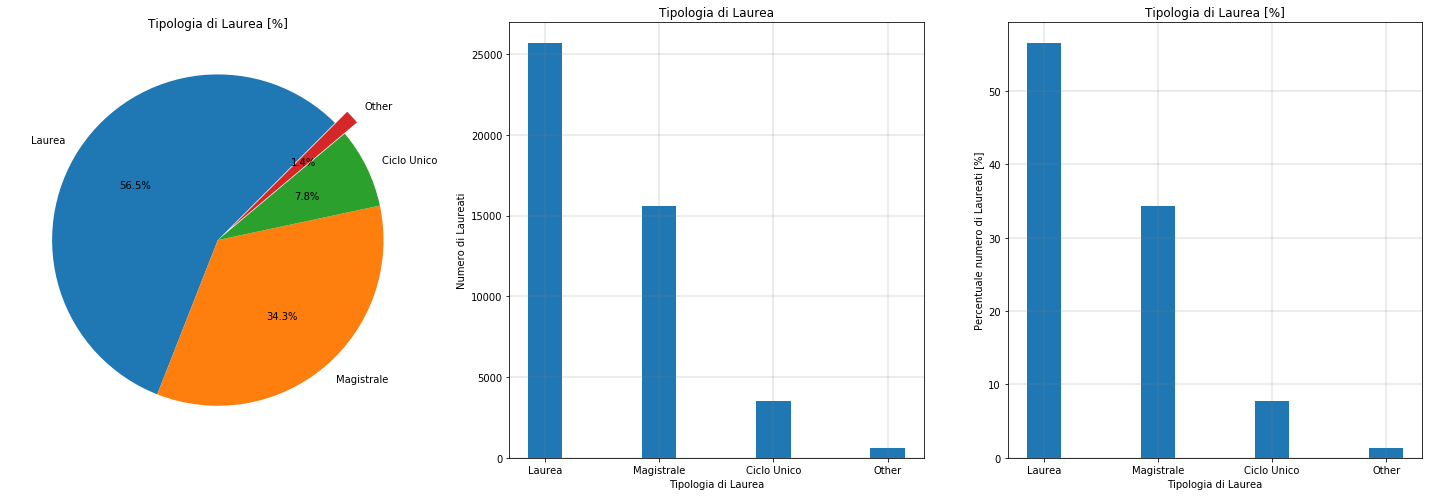

,Tipologia di Corso,Totale Laureati,Percentuale [\%]
0,Laurea (dm 270/04),25678,56.54
1,Laurea Magistrale (dm 270/04),15578,34.30
2,Laurea Magistrale Ciclo Unico (dm 270/04),3531,7.77
3,Altri,632,1.39


In [8]:
#Calcolare la lunghezza della tabella
len3=len(TIPOLOGIA_CORSO)

#Estrapolare i dati dalla colonna "tipologia_corso"
D1=[]
for i in range(len3):
    D1.append(TIPOLOGIA_CORSO[i][1])

#Estrapolare i dati dalla colonna "totale_laureati_2017"
D0=[]
for i in range(len3):
    D0.append(TIPOLOGIA_CORSO[i][0])

#Calcolare la percentuale della colonna "totale_laureati_2017"
DD=[]
for i in range(len3):
    DD.append((TIPOLOGIA_CORSO[i][1]/Tot_laureati)*100)

#Manipolare i dati in modo da pure i dati irrilevanti
for i in range(len3):
    DD[i]=round(DD[i],2)

DD1=[]
DD2=[]
DD_1=[]
DD_2=[]

for i in range(len3):
    if DD[i]>1:
        DD1.append(DD[i])
        DD_1.append(D1[i])
    else:
        DD2.append(DD[i])
        DD_2.append(D1[i])

DD2=round(sum(DD2),2)
DD_2=sum(DD_2)

DDD2=[]
DDD1=[]
DDD0=[]
for i in range(4):
    if i<3:
        DDD2.append(DD1[i])
        DDD0.append(D0[i])
        DDD1.append(D1[i])
        
    else:
        DDD2.append(DD2)
        DDD1.append(DD_2)
        DDD0.append('Altri')

#Ricostruire una nuova tabella   
dat1 = pd.DataFrame({'Tipologia di Corso':DDD0})
dat2 = pd.DataFrame({'Totale Laureati':DDD1})
dat3 = pd.DataFrame({'Percentuale [\%]':DDD2})
dat1_new = dat1.join(dat2)
data= dat1_new.join(dat3)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))
labels = ['Laurea', 'Magistrale','Ciclo Unico','Other']

#Grafico a Torta
explode = (0, 0, 0, 0.1)
ax1.pie(DDD2,explode=explode, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Laurea [%]')


xticks = [1,2,3,4] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,DDD1, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Laurea',ylabel='Numero di Laureati',title="Tipologia di Laurea")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,DDD2, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Laurea',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di Laurea [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)

fig.tight_layout()
plt.show()

data

I risultati presentano solo più 4 categorie (rispetto alle 8 iniziali), in quanto sono state inglocate nella voce "Altri" tutti le tipologie a minor impatto. Si può osservare una netta differenza tra le varie tipologie. Si può inoltre notare che sul totale di studenti laureati nel 2017 (45.419), un 34,3% di essi ha acquisito una laurea magistrale e solo un 7,8% una laurea magistrale a ciclo unico.

##### Analisi per tipologia di Ateneo

Lo scopo di tale analisi è quello di osservare l'andamento dei laureati in funzione dell'ateneo.

La metodologia utilizzata è analoga a quella riportata sopra, ma si sono mantenuti tutti i dati iniziali ottenuti dalla query SQL, riportati sotto.

In [30]:
#2. Suddivisione per Tipologia di Ateneo

NOME_ATENEO= %sql select "NOME_ATENEO", sum(laureati_totale) as Totale_per_Ateneo from MILANO_LAUREATI_ATENEO group by "NOME_ATENEO" order by Totale_per_Ateneo desc
NOME_ATENEO.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,nome_ateneo,totale_per_ateneo
0,Milano,11435
1,Milano Politecnico,11040
2,Milano Cattolica,9960
3,Milano Bicocca,6678
4,Milano Bocconi,4500
5,Milano IULM,1262
6,Milano San Raffaele,529
7,Rozzano (MI) Humanitas University,15


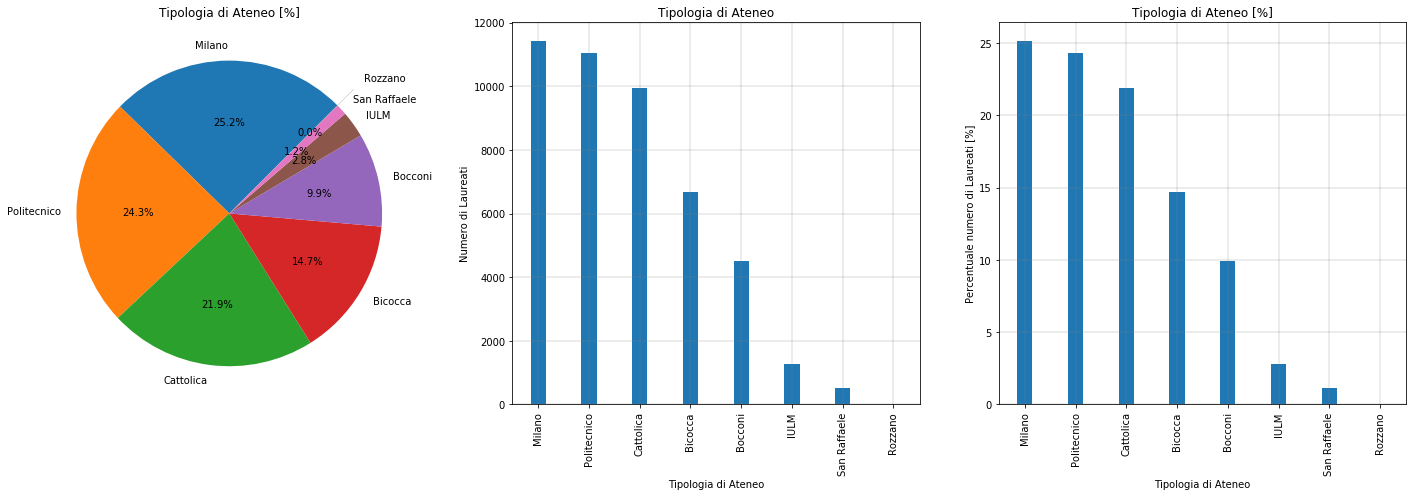

,Nome ateneo,Totale per ateneo,Percentuale[%]
0,Milano,11435,25.18
1,Milano Politecnico,11040,24.31
2,Milano Cattolica,9960,21.93
3,Milano Bicocca,6678,14.70
4,Milano Bocconi,4500,9.91
5,Milano IULM,1262,2.78
6,Milano San Raffaele,529,1.16
7,Rozzano (MI) Humanitas University,15,0.03


In [32]:
#Calcolare la lunghezza della tabella
len4=len(NOME_ATENEO)

#Estrapolare i dati dal database "NOME_ATENEO"
AT1=[]
AT0=[]
for i in range(len4):
    AT1.append(NOME_ATENEO[i][1])
    AT0.append(NOME_ATENEO[i][0])
Tot_AT=sum(AT1)

#Calcolare i valori percentuali dalla colonna "totale_per_ateneo"
AT_new=[]
for i in range(len4):
    AT_new.append(round((AT1[i]/Tot_AT)*100,2))
AT_new

ATT0 = pd.DataFrame({'Nome ateneo':AT0})
ATT1 = pd.DataFrame({'Totale per ateneo':AT1})
ATT2 = pd.DataFrame({'Percentuale[%]':AT_new})
AT1_ = ATT0.join(ATT1)
AT = AT1_.join(ATT2)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))
labels = ['Milano','Politecnico','Cattolica','Bicocca','Bocconi','IULM','San Raffaele','Rozzano']
#Grafico a Torta
explode = (0,0,0,0,0,0,0,0.15)
ax1.pie(AT_new,explode=explode,labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Ateneo [%]')


xticks = [1,2,3,4,5,6,7,8] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,AT1, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Ateneo',ylabel='Numero di Laureati',title="Tipologia di Ateneo")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5,6,7,8] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,AT_new, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Ateneo',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di Ateneo [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)


fig.tight_layout()
plt.show()

AT

##### Analisi per tipologia di Classe di studi

Lo scopo di tale analisi è quello di osservare l'andamento dei laureati in funzione della classe di studi scelto.

La metodologia utilizzata è analoga a quella riportata sopra, ma l'analisi è stata fatta focalizzando l'attenzione sulle prime 10 categorie. Dopo una prima osservazione, ho valutato l'opzione di accorpare i dati per tipologie di classe "simili" in modo da ridurre il numero di categorie (da 10 a 5). Il grafico a torta ha i valori percentuali riferite al totali di laureati delle prime 10 categorie. Nella tabella sotto, ho riportato anche le percentuali rispetto al valore globale di laureati nel 2017.

In [43]:
CLASSE= %sql select "CLASSE", sum(laureati_totale) as Somma_laureati from MILANO_LAUREATI_ATENEO group by "CLASSE" order by Somma_laureati desc limit 10
CLASSE.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,classe,somma_laureati
0,Scienze dell'economia e della gestione aziendale,4427
1,Scienze economico-aziendali,3402
2,Ingegneria industriale,2287
3,Mediazione linguistica,1670
4,Magistrali in giurisprudenza,1652
5,Scienze della comunicazione,1492
6,Ingegneria dell'informazione,1307
7,Architettura e ingegneria edile-architettura,1156
8,Scienze dell'architettura,1092
9,"Professioni sanitarie, infermieristiche e prof...",1081


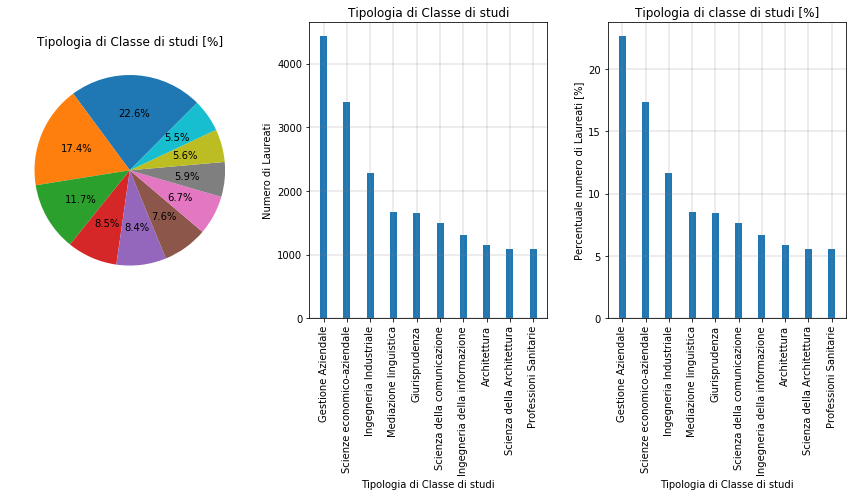

,Classe,Totale laureati,Percentuale su totale [%],Percentuale su top 10 [%]
0,Scienze dell'economia e della gestione aziendale,4427,9.75,22.63
1,Scienze economico-aziendali,3402,7.49,17.39
2,Ingegneria industriale,2287,5.04,11.69
3,Mediazione linguistica,1670,3.68,8.54
4,Magistrali in giurisprudenza,1652,3.64,8.44
5,Scienze della comunicazione,1492,3.28,7.63
6,Ingegneria dell'informazione,1307,2.88,6.68
7,Architettura e ingegneria edile-architettura,1156,2.55,5.91
8,Scienze dell'architettura,1092,2.40,5.58
9,"Professioni sanitarie, infermieristiche e prof...",1081,2.38,5.52


In [72]:
#Calcolare la lunghezza della tabella
len5=len(CLASSE)

#Estrapolare i dati dal database "CLASSE"
CC0=[]
CC1=[]

for i in range(len5):
    CC1.append(CLASSE[i][1])
    CC0.append(CLASSE[i][0])
    
Tot_CC1=sum(CC1)


CC1_new=[]
CC1_tot_new=[]
for i in range(len5):
    CC1_new.append(round((CC1[i]/Tot_CC1)*100,2))
    CC1_tot_new.append(round((CC1[i]/Tot_laureati)*100,2))
CC1_new

CCC0 = pd.DataFrame({'Classe':CC0})
CCC1 = pd.DataFrame({'Totale laureati':CC1})
CCC1_ = pd.DataFrame({'Percentuale su totale [%]':CC1_tot_new})
CCC2 = pd.DataFrame({'Percentuale su top 10 [%]':CC1_new})
CL1 = CCC0.join(CCC1)
CL1_ = CL1.join(CCC1_)
CL = CL1_.join(CCC2)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,7))

#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(CC1_new, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe di studi [%]')
labels = ['Gestione Aziendale', 'Scienze economico-aziendale','Ingegneria Industriale', 'Mediazione linguistica','Giurisprudenza','Scienza della comunicazione','Ingegneria della informazione', 'Architettura','Scienza della Architettura','Professioni Sanitarie']

xticks = [1,2,3,4,5,6,7,8,9,10] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,CC1, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Classe di studi',ylabel='Numero di Laureati',title="Tipologia di Classe di studi")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5,6,7,8,9,10] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,CC1_new, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Classe di studi',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di classe di studi [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)


fig.tight_layout()
plt.show()

CL

Come già accennato nell'introduzione dell'analisi, ho effettuato una rimanipolazione dei dati in modo da evidenziare le differenze tra le varie classi di studi.

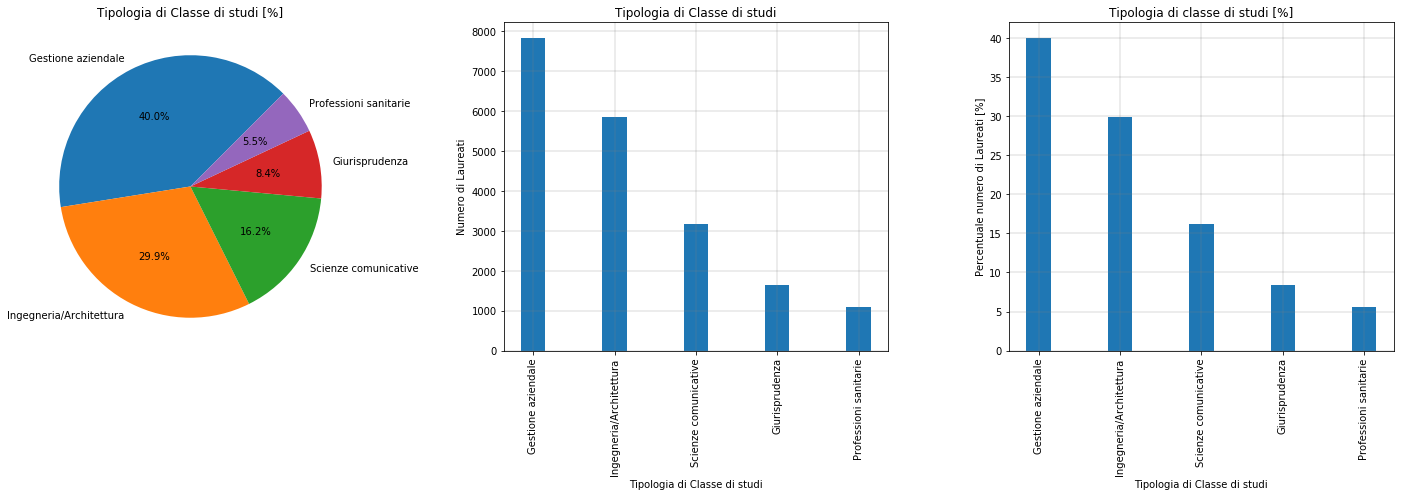

,Classe,Totale laureati,Percentuale su top5 [%]
0,Gestione aziendale,7829,40.02
1,Ingegneria/Architettura,5842,29.86
2,Scienze comunicative,3162,16.17
3,Giurisprudenza,1652,8.44
4,Professioni sanitarie/Infermieristiche,1081,5.52


In [48]:
#Rimanipulazione dei dati
CC1_new

#Raggruppamento del numero di laureati
CC_u1 = CC1[0]+CC1[1]
CC_u2 = CC1[2]+CC1[6]+CC1[7]+CC1[8]
CC_u3 = CC1[3]+CC1[5]
CC_u4 = CC1[4]
CC_u5 = CC1[9]

#Raggruppamento del numero di laureati in percentuale
CC_u6 = round(CC1_new[0]+CC1_new[1],2)
CC_u7 = CC1_new[2]+CC1_new[6]+CC1_new[7]+CC1_new[8]
CC_u8 = round(CC1_new[3]+CC1_new[5],2)
CC_u9 = round(CC1_new[4],2)
CC_u10 = CC1_new[9]

#Raggruppamento del numero di laureati in percentuale
CC_u11 = 'Gestione aziendale'
CC_u12 = 'Ingegneria/Architettura'
CC_u13 = 'Scienze comunicative'
CC_u14 = 'Giurisprudenza'
CC_u15 = 'Professioni sanitarie/Infermieristiche'

CC_u =[CC_u1, CC_u2, CC_u3, CC_u4,CC_u5]
CC_u1 = [CC_u6, CC_u7, CC_u8, CC_u9,CC_u10]
CC_u2 = [CC_u11, CC_u12, CC_u13, CC_u14,CC_u15]

C_ultimo0 = pd.DataFrame({'Classe':CC_u2})
C_ultimo1 = pd.DataFrame({'Totale laureati':CC_u})
C_ultimo2 = pd.DataFrame({'Percentuale su top5 [%]':CC_u1})
CL_1 = C_ultimo0.join(C_ultimo1)
C_ultimo = CL_1.join(C_ultimo2)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))

labels = ['Gestione aziendale','Ingegneria/Architettura','Scienze comunicative','Giurisprudenza','Professioni sanitarie']
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(CC_u1, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe di studi [%]')


xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,CC_u, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Classe di studi',ylabel='Numero di Laureati',title="Tipologia di Classe di studi")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,CC_u1, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Classe di studi',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di classe di studi [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

C_ultimo

La nuova suddivisione permette di evidenziare in modo chiaro la differenza presente tra le varie classi di studi, in particolare tra quelle manageriali e quelle umanistiche: circa il 40% dei laureati nel 2017 ha scelto un percorso di studi più improntati sulla gestione aziendale, mentre, meno del 6% circa degli studenti si è laureati in professioni sanitarie/infermieristiche.

### Analisi per Genere

A questo punto, ho focalizzato l'attenzione sul numero di laureati in base al genere (maschio, femmina).

Il primo passo di tale analisi è stato quello di estrapolare tutti i dati necessari dal database **"MILANO_LAUREATI_GENERE"**. Sono partita dall'estrapolarmi il numero totale di laureati (sia maschi che femmine). Quindi ho calcolato le loro percentuale e ho diagrammato il loro risultato in un grafico a torta.

Il secondo passo è stato quello di analizzare le principali scelte dei laureati, sia in termini di classe che in termini di ateneo. Quindi ho focalizzato la mia attenzione sulle prime 5 categorie, analizzando le loro percentuali (che risultano essere un parziale del totale).

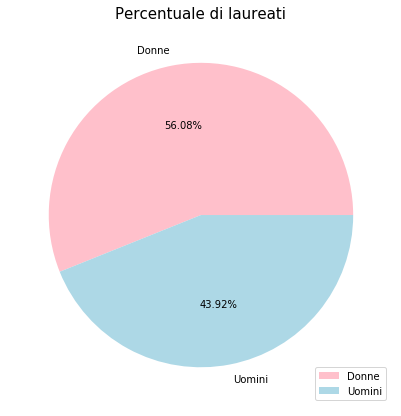

Il numero di Donne laureate è pari a:  25469 e corrisponde ad una percentuale del: 56.08 % 
Il numero di Uomini laureati è pari a:  19950 e corrisponde ad una percentuale del: 43.92 %


In [14]:
#Calcolare il totale di laureati maschi e femmine e le loro rispettive percentuali
GENERE.DataFrame()

len1=len(GENERE)

#Da Database Genere ottengo un vettore con il numero di laureate donne
F=[]

for i in range(len1):
    if GENERE[i][5]=='F':
        F.append(GENERE[i][6])
          
Donne=sum(F)
        
#Da Database Genere ottengo un vettore con il numero di laureati uomini
M=[]
M0=[]
for j in range(len1):
    if GENERE[j][5]=='M':
        M.append(GENERE[j][6])
        M0.append(GENERE[j][6])

Uomini=sum(M)

#Calcolo la percentuale di laureati sia donne che uomini
Donne_per=Donne/Tot_laureati
Donne_per=(Donne_per*100)
Donne_per=round(Donne_per,2)

Uomini_per=Uomini/Tot_laureati
Uomini_per=(Uomini_per*100)
Uomini_per=round(Uomini_per,2)


#Grafico delle percentuali
colors=['pink','lightblue']
values=[Donne_per,Uomini_per]
labels=['Donne', 'Uomini']
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,colors=colors,labels=labels, autopct='%1.2f%%')
plt.title('Percentuale di laureati',color='black',fontsize=15)
plt.legend(['Donne', 'Uomini'] , loc=4)
plt.show()

print('Il numero di Donne laureate è pari a: ',Donne,'e corrisponde ad una percentuale del:',Donne_per,'%', '\nIl numero di Uomini laureati è pari a: ', Uomini,'e corrisponde ad una percentuale del:', Uomini_per,'%')

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


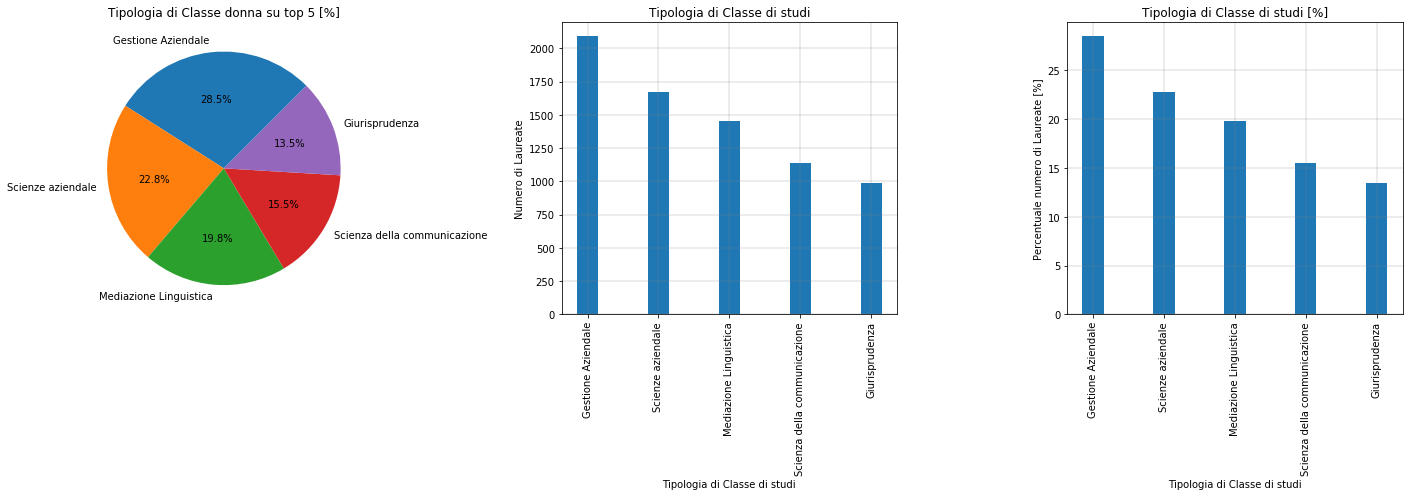

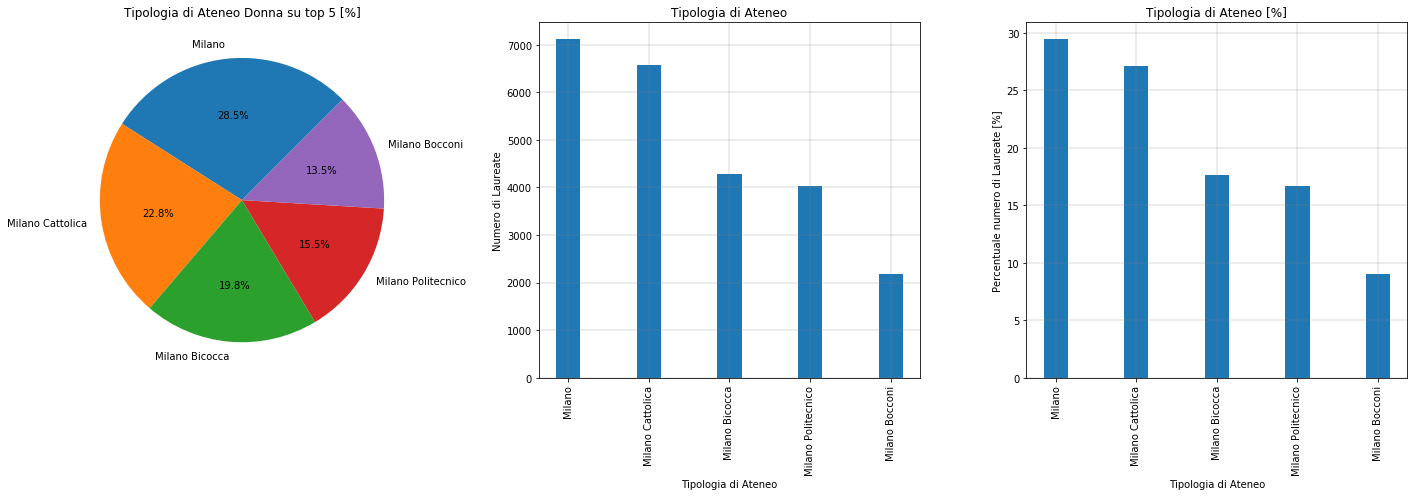

,Classe,Numero laureati per Classe,Numero laureati per Classe su totale donne laureate [%],Numero di laureate per Classe su top 5 [%],Ateneo,Numero laureati per Ateneo,Numero laureati per Ateneo su totale donne laureate [%],Numero di laureate per Ateneo su top 5[%]
0,Scienze dell'economia e della gestione aziendale,2090,8.21,28.49,Milano,7114,27.93,29.44
1,Scienze economico-aziendali,1670,6.56,22.76,Milano Cattolica,6565,25.78,27.16
2,Mediazione linguistica,1456,5.72,19.84,Milano Bicocca,4274,16.78,17.68
3,Scienze della comunicazione,1134,4.45,15.46,Milano Politecnico,4036,15.85,16.70
4,Magistrali in giurisprudenza,987,3.88,13.45,Milano Bocconi,2179,8.56,9.02


In [70]:
#Estrapolazione dati attraverso query SQL

DONNE_CLASSE=%sql select "CLASSE", sum(laureati_totale) as totale_donne_laureate from MILANO_LAUREATI_GENERE where "SESSO" like 'F' group by "CLASSE" order by totale_donne_laureate desc limit 5
DONNE_CLASSE.DataFrame()

DONNE_ATENEO=%sql select "NOME_ATENEO", sum(laureati_totale) as totale_donne_laureate from MILANO_LAUREATI_GENERE where "SESSO" like 'F' group by "NOME_ATENEO" order by totale_donne_laureate desc limit 5
DONNE_ATENEO.DataFrame()

len6=len(DONNE_CLASSE)

Donna0 = []
Donna1= []
Donna_percentuale =[]
Donna_percentuale1 =[]
Donna_percentuale_totale = []
Donna_percentuale_totale_classe = []
for i in range(len6):
    Donna1.append(DONNE_CLASSE[i][1])
    Donna0.append(DONNE_CLASSE[i][0])

TOT_DONNE_CLASSE=sum(Donna1)

for i in range(len6):
    Donna_percentuale.append(round((Donna1[i]/TOT_DONNE_CLASSE)*100,2))
    Donna_percentuale_totale.append(round((Donna1[i]/Donne)*100,2))
    
len7=len(DONNE_ATENEO)  

Donna2 = []
Donna3 = []
Donne4 = []
for i in range(len7):
    Donna3.append(DONNE_ATENEO[i][1])
    Donna2.append(DONNE_ATENEO[i][0])
    
TOT_DONNE_ATENEO=sum(Donna3)

for i in range(len6):
    Donna_percentuale1.append(round((Donna3[i]/TOT_DONNE_ATENEO)*100,2))
    Donna_percentuale_totale_classe.append(round((Donna3[i]/Donne)*100,2))

Donnaa0 = pd.DataFrame({'Classe':Donna0})
Donnaa1 = pd.DataFrame({'Numero laureati per Classe':Donna1})
Donn_percentuale_totale = pd.DataFrame({'Numero laureati per Classe su totale donne laureate [%]':Donna_percentuale_totale})
Donn_percentuale = pd.DataFrame({'Numero di laureate per Classe su top 5 [%]':Donna_percentuale})
Donnaa2 = pd.DataFrame({'Ateneo':Donna2})
Donnaa3 = pd.DataFrame({'Numero laureati per Ateneo':Donna3})
Donn_percentuale_totale_classe = pd.DataFrame({'Numero laureati per Ateneo su totale donne laureate [%]':Donna_percentuale_totale_classe})
Donn_percentuale1 = pd.DataFrame({'Numero di laureate per Ateneo su top 5[%]':Donna_percentuale1})

Don1=Donnaa0.join(Donnaa1)
Donna_totale = Don1.join(Donn_percentuale_totale)
Don2=Donna_totale.join(Donn_percentuale)
Don3=Don2.join(Donnaa2)
Don4=Don3.join(Donnaa3)
Donna_totale_classe = Don4.join(Donn_percentuale_totale_classe)
Donna=Donna_totale_classe.join(Donn_percentuale1)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))

labels = ['Gestione Aziendale','Scienze aziendale','Mediazione Linguistica','Scienza della communicazione','Giurisprudenza']
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(Donna1, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe donna su top 5 [%]')


xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,Donna1, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Classe di studi',ylabel='Numero di Laureate',title="Tipologia di Classe di studi")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,Donna_percentuale, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Classe di studi',ylabel='Percentuale numero di Laureate [%]',title="Tipologia di Classe di studi [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))

labels = Donna2
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(Donna1, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Ateneo Donna su top 5 [%]')


xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,Donna3, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Ateneo',ylabel='Numero di Laureate',title="Tipologia di Ateneo")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,Donna_percentuale1, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Ateneo',ylabel='Percentuale numero di Laureate [%]',title="Tipologia di Ateneo [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

Donna

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


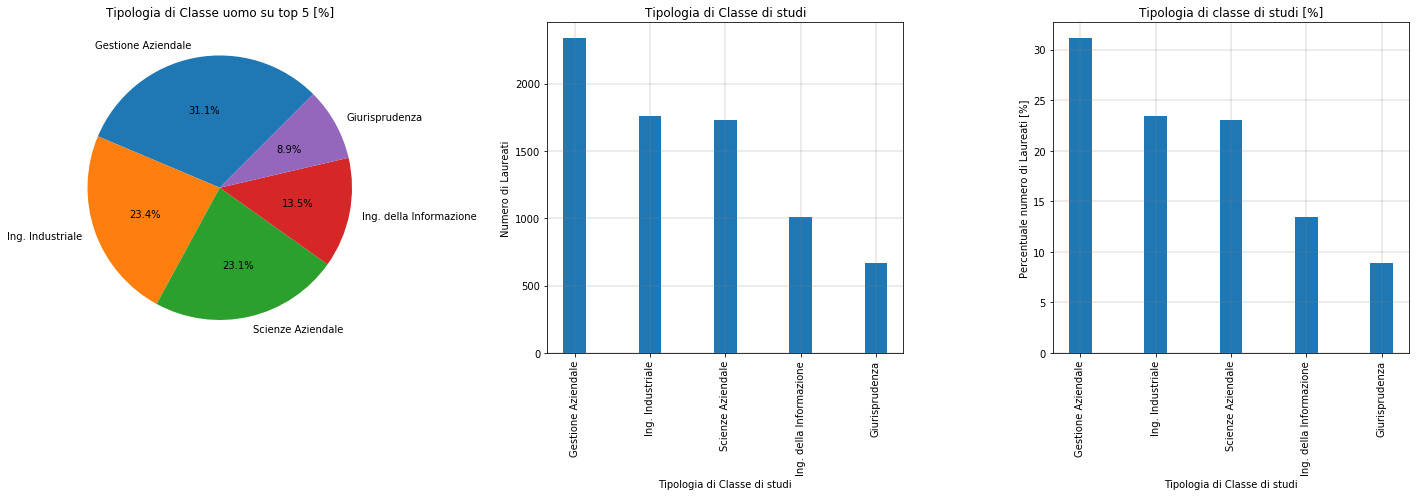

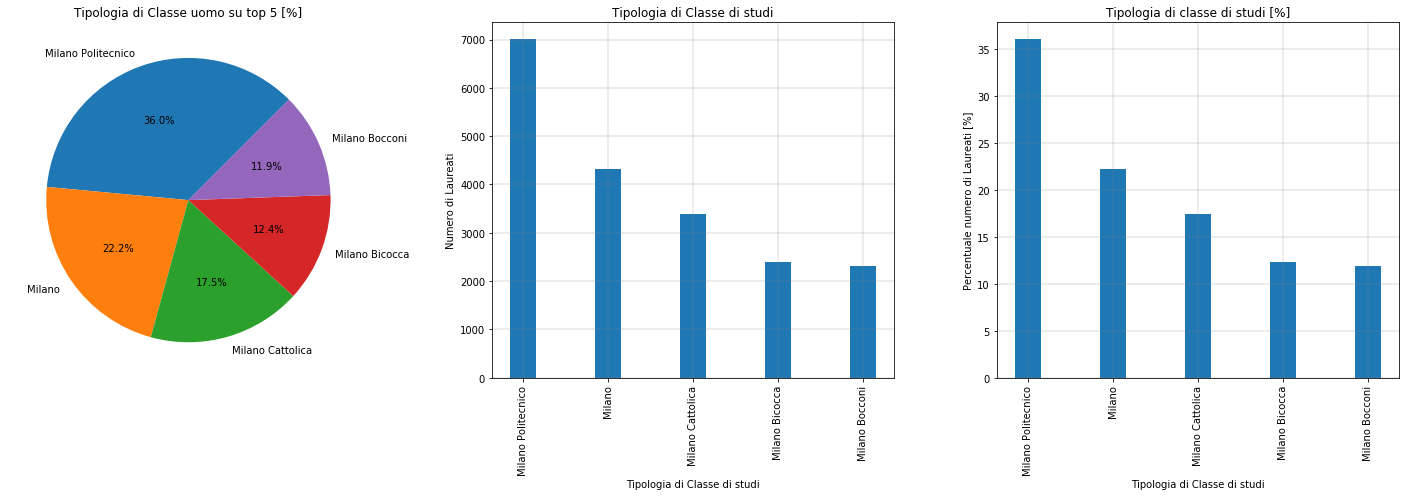

,Classe,Numero laureati per Classe,Numero laureati per Classe su totale [%],Numero laureati per Classe su top 5[%],Ateneo,Numero laureati per Ateneo,Numero laureati per Ateneo su totale [%],Numero laureati per Ateneo su top 5 [%]
0,Scienze dell'economia e della gestione aziendale,2337,11.71,31.14,Milano Politecnico,7004,35.11,36.02
1,Ingegneria industriale,1759,8.82,23.44,Milano,4321,21.66,22.22
2,Scienze economico-aziendali,1732,8.68,23.08,Milano Cattolica,3395,17.02,17.46
3,Ingegneria dell'informazione,1011,5.07,13.47,Milano Bicocca,2404,12.05,12.36
4,Magistrali in giurisprudenza,665,3.33,8.86,Milano Bocconi,2321,11.63,11.94


In [69]:
#Uomo

UOMINI_CLASSE=%sql select "CLASSE", sum(laureati_totale) as totale_uomini_laureati from MILANO_LAUREATI_GENERE where "SESSO" like 'M' group by "CLASSE" order by totale_uomini_laureati desc limit 5
UOMINI_CLASSE.DataFrame()

UOMINI_ATENEO=%sql select "NOME_ATENEO", sum(laureati_totale) as totale_uomini_laureati from MILANO_LAUREATI_GENERE where "SESSO" like 'M' group by "NOME_ATENEO" order by totale_uomini_laureati desc limit 5
UOMINI_ATENEO.DataFrame()


len8=len(UOMINI_CLASSE)

Uomo0 = []
Uomo1= []
Uomo_percentuale =[]
Uomo_percentuale1 =[]
Uomo_percentuale_totale=[]
Uomo_percentuale_totale_classe=[]

for i in range(len8):
    Uomo1.append(UOMINI_CLASSE[i][1])
    Uomo0.append(UOMINI_CLASSE[i][0])

TOT_UOMINI_CLASSE=sum(Uomo1)

for i in range(len8):
    Uomo_percentuale.append(round((Uomo1[i]/TOT_UOMINI_CLASSE)*100,2))
    Uomo_percentuale_totale.append(round((Uomo1[i]/Uomini)*100,2))
    
len9=len(UOMINI_ATENEO)  

Uomo2 = []
Uomo3 = []
Uomo4 = []
for i in range(len9):
    Uomo3.append(UOMINI_ATENEO[i][1])
    Uomo2.append(UOMINI_ATENEO[i][0])
    
TOT_UOMINI_ATENEO=sum(Uomo3)

for i in range(len9):
    Uomo_percentuale1.append(round((Uomo3[i]/TOT_UOMINI_ATENEO)*100,2))
    Uomo_percentuale_totale_classe.append(round((Uomo3[i]/Uomini)*100,2))

Uomoo0 = pd.DataFrame({'Classe':Uomo0})
Uomoo1 = pd.DataFrame({'Numero laureati per Classe':Uomo1})
Uom_percentuale_totale = pd.DataFrame({'Numero laureati per Classe su totale [%]':Uomo_percentuale_totale})
Uom_percentuale = pd.DataFrame({'Numero laureati per Classe su top 5 [%]':Uomo_percentuale})
Uomoo2 = pd.DataFrame({'Ateneo':Uomo2})
Uomoo3 = pd.DataFrame({'Numero laureati per Ateneo':Uomo3})
Uom_percentuale1 = pd.DataFrame({'Numero laureati per Ateneo su top 5 [%]':Uomo_percentuale1})
Uom_percentuale_totale_classe = pd.DataFrame({'Numero laureati per Ateneo su totale [%]':Uomo_percentuale_totale_classe})

Uom1=Uomoo0.join(Uomoo1)
Uom_per_tot=Uom1.join(Uom_percentuale_totale)
Uom2=Uom_per_tot.join(Uom_percentuale)
Uom3=Uom2.join(Uomoo2)
Uom4=Uom3.join(Uomoo3)
Uom_per_tot_classe=Uom4.join(Uom_percentuale_totale_classe)
Uomo=Uom_per_tot_classe.join(Uom_percentuale1)

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))

labels = ['Gestione Aziendale','Ing. Industriale','Scienze Aziendale','Ing. della Informazione','Giurisprudenza']
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(Uomo1, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe uomo su top 5 [%]')


xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,Uomo1, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Classe di studi',ylabel='Numero di Laureati',title="Tipologia di Classe di studi")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks,Uomo_percentuale, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Classe di studi',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di classe di studi [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

#Mostrare i grafici
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))

labels = Uomo2
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(Uomo3, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe uomo su top 5 [%]')


xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Primo grafico a barre
ax2.bar(xticks,Uomo3, width=0.3, align="center")
ax2.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax2.set_xticks(xticks)
ax2.set(xlabel='Tipologia di Classe di studi',ylabel='Numero di Laureati',title="Tipologia di Classe di studi")
ax2.grid(color='grey', linestyle='-', linewidth=0.3)

xticks = [1,2,3,4,5] # ci serve per posizionare le barre e anche le label

#Secondo grafico a barre
ax3.bar(xticks, Uomo_percentuale1, width=0.3, align="center")
ax3.set(xlabel='Tipologia di Classe di studi',ylabel='Percentuale numero di Laureati [%]',title="Tipologia di classe di studi [%]")
ax3.set_xticklabels(labels)  # verranno posizionate dove sono gli xticks
ax3.set_xticks(xticks)
ax3.grid(color='grey', linestyle='-', linewidth=0.3)


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

Uomo

Quello che possiamo osservare è:

- 1. che i laureati preferiscono scegliere dei corsi di studi più manageriali, incentrati sull'economia e la gestione aziendale. Infatti, si può osservare come sia **Scienze dell'economia e della gestione aziendale** che **Sceinze economico-aziendali** sia tra le prime scelte per entrambi i sessi (rispettivamente 28.5% e 22.8% per le laureate e 31.1% e 23.4% per i laureati).

- 2. le differenze si osservano per le scelte successive. Mentre i ragazzi preferiscono incentrarsi più su ambiti ingegneristici (che può essere in parte confermato dall'alta percentuale di laureati al Politecnico di Milano, 36.0%), le ragazze puntano più a studi liguistici (che si potrebbe confermare in parte dalla percentuale di iscritti all'università di Milano, 29.4% contro i 16.7% di laureate al Politecnico di Milano).

Essendo però un'analisi parziale, queste considerazioni potrebbero non essere veritieri. 

Sotto ho analizzato le percentuali degli studenti laureati in Ingegneria, suddivisi per corso e per genere.

In [18]:
DONNE_CLASSE_INGEGNERIA=%sql select "CLASSE", sum(laureati_totale) as totale_donne_laureate from MILANO_LAUREATI_GENERE where "SESSO" like 'F' and "CLASSE" like 'Ingegneria%' group by "CLASSE" order by totale_donne_laureate desc limit 5
DONNE_CLASSE_INGEGNERIA.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,classe,totale_donne_laureate
0,Ingegneria industriale,528
1,Ingegneria dell'informazione,296
2,Ingegneria gestionale,194
3,Ingegneria biomedica,130
4,Ingegneria dei sistemi edilizi,111


In [19]:
UOMINI_CLASSE_INGEGNERIA=%sql select "CLASSE", sum(laureati_totale) as totale_uomini_laureate from MILANO_LAUREATI_GENERE where "SESSO" like 'M' and "CLASSE" like 'Ingegneria%' group by "CLASSE" order by totale_uomini_laureate desc limit 5
UOMINI_CLASSE_INGEGNERIA.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,classe,totale_uomini_laureate
0,Ingegneria industriale,1759
1,Ingegneria dell'informazione,1011
2,Ingegneria gestionale,370
3,Ingegneria meccanica,302
4,Ingegneria civile e ambientale,277


In [20]:
#Calcolo della percentuale di donne iscritte in Ingegneria
donne_classe_ingegneria = []
donne_classe_ingegneria1 = []
donne_classe_ingegneria_per = []

len10 = len(DONNE_CLASSE_INGEGNERIA)

for i in range(len10):
    donne_classe_ingegneria.append(DONNE_CLASSE_INGEGNERIA[i][1])
    donne_classe_ingegneria1.append(DONNE_CLASSE_INGEGNERIA[i][0])

tot_donne_ing = sum(donne_classe_ingegneria)

donne_ing_perc = round((tot_donne_ing/Donne)*100,2)

for i in range(len10):
    donne_classe_ingegneria_per.append(round(DONNE_CLASSE_INGEGNERIA[i][1]/tot_donne_ing*100,2))
    

#Calcolo della percentuale di uomini iscritti in Ingegneria
uomini_classe_ingegneria = []
uomini_classe_ingegneria1 = []
uomini_classe_ingegneria_per = []

len11 = len(UOMINI_CLASSE_INGEGNERIA)

for i in range(len11):
    uomini_classe_ingegneria.append(UOMINI_CLASSE_INGEGNERIA[i][1])
    uomini_classe_ingegneria1.append(UOMINI_CLASSE_INGEGNERIA[i][0])

tot_uomini_ing = sum(uomini_classe_ingegneria)

uomini_ing_perc = round((tot_uomini_ing/Uomini)*100,2)

for i in range(len11):
    uomini_classe_ingegneria_per.append(round(UOMINI_CLASSE_INGEGNERIA[i][1]/tot_uomini_ing*100,2))

x_donna= [Donne,tot_donne_ing]
x_donna_perc = [Donne_per,donne_ing_perc]
x_donna_ing= pd.DataFrame({'Donne':x_donna})
x_donna_ing_per = pd.DataFrame({'Donne [%]':x_donna_perc})

donne_classe_ingegn_1 =pd.DataFrame ({'Ing Donne':donne_classe_ingegneria1})
donne_classe_ingegn_ =pd.DataFrame ({'Ing Donne su top 5[#]':donne_classe_ingegneria})
donne_classe_ingegn_per =pd.DataFrame ({'Ing Donne su top 5[%]':donne_classe_ingegneria_per})

x_uomo= [Uomini,tot_uomini_ing]
x_uomo_perc = [Uomini_per,uomini_ing_perc]
x_uomo_ing = pd.DataFrame({'Uomo':x_uomo})
x_uomo_ing_per = pd.DataFrame({'Uomo [%]':x_uomo_perc})

uomini_classe_ingegn_1 =pd.DataFrame ({'Ing Uomini':uomini_classe_ingegneria1})
uomini_classe_ingegn_ =pd.DataFrame ({'Ing Uomini su top 5[#]':uomini_classe_ingegneria})
uomini_classe_ingegn_per =pd.DataFrame ({'Ing Uomini su top 5[%]':uomini_classe_ingegneria_per})

genere_ing1 = x_donna_ing.join(x_donna_ing_per)
genere_ing2 = genere_ing1.join(x_uomo_ing)
genere_ing = genere_ing2.join(x_uomo_ing_per)

print('Il numero totale di studenti laureati nel 2017 è di:',Tot_laureati)

DONNE_CLASSE_INGEGNERIA_new1=donne_classe_ingegn_1.join(donne_classe_ingegn_)
DONNE_CLASSE_INGEGNERIA_new=DONNE_CLASSE_INGEGNERIA_new1.join(donne_classe_ingegn_per)

UOMINI_CLASSE_INGEGNERIA_new1=uomini_classe_ingegn_1.join(uomini_classe_ingegn_)
UOMINI_CLASSE_INGEGNERIA_new=UOMINI_CLASSE_INGEGNERIA_new1.join(uomini_classe_ingegn_per)

genere_ing

Il numero totale di studenti laureati nel 2017 è di: 45419


,Donne,Donne [%],Uomo,Uomo [%]
0,25469,56.08,19950,43.92
1,1259,4.94,3719,18.64


In [21]:
print('Le percentuali sono state calcolate sul totale di donne laureati in Ingegneria, pari a:',tot_donne_ing)
DONNE_CLASSE_INGEGNERIA_new

Le percentuali sono state calcolate sul totale di donne laureati in Ingegneria, pari a: 1259


,Ing Donne,Ing Donne [#],Ing Donne [%]
0,Ingegneria industriale,528,41.94
1,Ingegneria dell'informazione,296,23.51
2,Ingegneria gestionale,194,15.41
3,Ingegneria biomedica,130,10.33
4,Ingegneria dei sistemi edilizi,111,8.82


In [22]:
print('Le percentuali sono state calcolate sul totale di uomini laureati in Ingegneria, pari a:',tot_uomini_ing)
UOMINI_CLASSE_INGEGNERIA_new

Le percentuali sono state calcolate sul totale di uomini laureati in Ingegneria, pari a: 3719


,Ing Uomini,Ing Donne [#],Ing Uomini [%]
0,Ingegneria industriale,1759,47.30
1,Ingegneria dell'informazione,1011,27.18
2,Ingegneria gestionale,370,9.95
3,Ingegneria meccanica,302,8.12
4,Ingegneria civile e ambientale,277,7.45


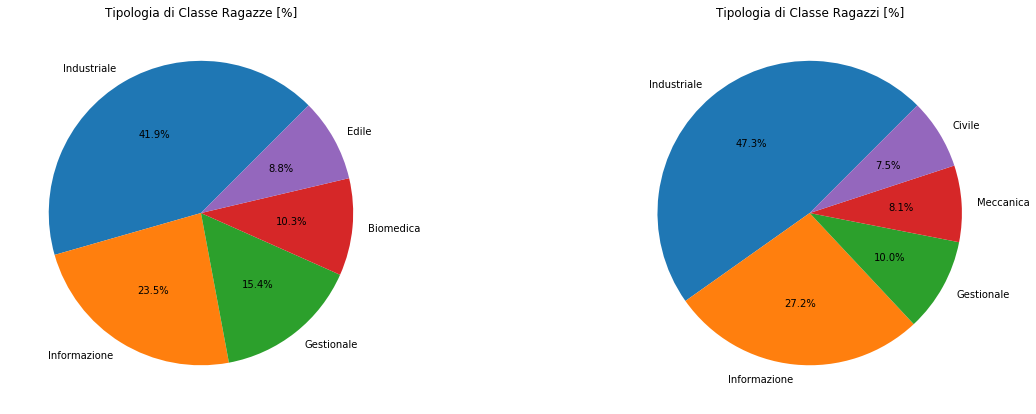

In [23]:
#Mostrare i grafici
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))

labels = ['Industriale','Informazione','Gestionale','Biomedica','Edile']
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax1.pie(donne_classe_ingegneria_per, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('Tipologia di Classe Ragazze [%]')


labels = ['Industriale','Informazione','Gestionale','Meccanica','Civile']
#Grafico a Torta
#explode = (0, 0, 0, 0.1)
ax2.pie(uomini_classe_ingegneria_per, labels=labels, autopct='%1.1f%%', startangle=45)
ax2.set_title('Tipologia di Classe Ragazzi [%]')


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

Quello che si può osservare dalla tabella riportata sopra:

- 1. del 56.1% di laureate, solo il 4.9% circa di esse sceglie un percorso di studi in Ingegneria. E di questo 4.9%, il 41.9% circa ha conseguito una laurea in ingegneria industriale.

- 2. mentre del 43.9% di laureati, il 18.6% circa di essi sceglie un percorso di studi in Ingegneria. E di questo 18.6%, il 47.3% circa ha conseguito una laurea in ingegneria industriale.

- 3. in entrambe i casi, le classi di ingegneria più "gettonate" per entrambi i sessi sono: **Ingegneria Industriale, Ingegneria dell'Informazione, Ingegneria gestionale**.

### 6. Analisi per Nazionalità

Lo scopo di questa analisi è quello di studiare l'andamento degli studenti stranieri, negli atenei milanesi. 

Il primo step è quello di analizzare le principale nazioni con il più alto numero di studenti laureati a Milano durante il 2017. In particolare, concentrarsi sulle prime 5 nazioni. Le percentuali che vengono ricavate, si basano sia sul numero totale di studenti stranieri laureati nel 2017 (globale) che sul numero totale delle prime 5 categorie (parziale). 

Il secondo step è quello di analizzare gli atenei con il più alto numero di laureati stranieri nel 2017. Anche qui le percentuali saranno calcolate sia sul globale che sul parziale.

In [24]:
NAZIONALITA = %sql select "CITTADINANZA", sum(laureati_stranieri) as laureati_stranieri from MILANO_LAUREATI_NAZIONE group by "CITTADINANZA" order by laureati_stranieri desc
NAZIONALITA_top5 = %sql select "CITTADINANZA", sum(laureati_stranieri) as laureati_stranieri from MILANO_LAUREATI_NAZIONE group by "CITTADINANZA" order by laureati_stranieri desc limit 5
NAZIONALITA.DataFrame()
NAZIONALITA_top5.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,cittadinanza,laureati_stranieri
0,CHINA,468
1,ALBANIA,239
2,"IRAN, ISLAMIC REPUBLIC OF",160
3,TURKEY,144
4,ROMANIA,129


Qui ho evidenziato le prime 5 nazioni con il più alto numero di laureati presso gli atenei milanesi nel 2017, secondo il database "MILANO_LAUREATI_NAZIONE".

In [28]:
len12=len(NAZIONALITA)
len13=len(NAZIONALITA_top5)

nazionalita =[]
nazionalita_top5=[]
nazionalita_top5_0=[]
perc_nazion_sutot =[]
perc_nazion_top5 =[]

for i in range(len12):
    nazionalita.append(NAZIONALITA[i][1])

for i in range(len13):
    nazionalita_top5.append(NAZIONALITA_top5[i][1])
    nazionalita_top5_0.append(NAZIONALITA_top5[i][0])
    
tot_nazion = sum(nazionalita)
tot_nazion_top5 = sum(nazionalita_top5)

for i in range(len13):
    perc_nazion_sutot.append(round(NAZIONALITA_top5[i][1]/tot_nazion*100,2))
    perc_nazion_top5.append(round(NAZIONALITA_top5[i][1]/tot_nazion_top5*100,2))

nazionalita_top5_00 = pd.DataFrame({'Top 5':nazionalita_top5_0})
perc_nazion_sutot0 = pd.DataFrame({'Percentuale sul totale [%]':perc_nazion_sutot})
perc_nazion_sutop50 = pd.DataFrame({'Percentuale su top 5 [%]':perc_nazion_top5})

stud_nazione0 = nazionalita_top5_00.join(perc_nazion_sutot0)
stud_nazione = stud_nazione0.join(perc_nazion_sutop50)

print('Il totale degli studenti stranieri laureati a Milano è di:',tot_nazion)

print('\n mentre il totale delle prime 5 nazioni con più alto numero di laureati a Milano è di:',tot_nazion_top5 )

stud_nazione

Il totale degli studenti stranieri laureati a Milano è di: 3016

 mentre il totale delle prime 5 nazioni con più alto numero di laureati a Milano è di: 1140


,Top 5,Percentuale sul totale [%],Percentuale su top 5 [%]
0,CHINA,15.52,41.05
1,ALBANIA,7.92,20.96
2,"IRAN, ISLAMIC REPUBLIC OF",5.31,14.04
3,TURKEY,4.77,12.63
4,ROMANIA,4.28,11.32


Qui ho riportato le top 5 in percentuale, sia rispetto al globale che rispetto al parziale. Come si può osservare, la principale nazione con il più alto numero di laureati presso gli atenei milanesi è la cina con un 15.5% sul globale (e un 41.1% circa sul parziale), seguito poi dall'Albania con un 7.9% e dall'Iran con un 5.3%.

In [26]:
NAZIONALITA_ATENEO = %sql select "NOME_ATENEO", sum(laureati_stranieri) as laureati_stranieri from MILANO_LAUREATI_NAZIONE group by "NOME_ATENEO" order by laureati_stranieri desc
NAZIONALITA_top5_ATENEO = %sql select "NOME_ATENEO", sum(laureati_stranieri) as laureati_stranieri from MILANO_LAUREATI_NAZIONE group by "NOME_ATENEO" order by laureati_stranieri desc limit 5
NAZIONALITA_ATENEO.DataFrame()
NAZIONALITA_top5_ATENEO.DataFrame()

 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://pfq54849:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


,nome_ateneo,laureati_stranieri
0,Milano Politecnico,1300
1,Milano Bocconi,529
2,Milano,465
3,Milano Cattolica,394
4,Milano Bicocca,267


Ho riportato i principali atenei scelti dagli studenti stranieri nel 2017.

In [27]:
len14=len(NAZIONALITA_ATENEO)
len15=len(NAZIONALITA_top5_ATENEO)

nazionalita_ateneo =[]
nazionalita_top5_ateneo=[]
nazionalita_top5_0_ateneo=[]
perc_nazion_sutot_ateneo =[]
perc_nazion_top5_ateneo =[]

for i in range(len14):
    nazionalita_ateneo.append(NAZIONALITA_ATENEO[i][1])

for i in range(len15):
    nazionalita_top5_ateneo.append(NAZIONALITA_top5_ATENEO[i][1])
    nazionalita_top5_0_ateneo.append(NAZIONALITA_top5_ATENEO[i][0])
    
tot_nazion_ateneo = sum(nazionalita_ateneo)
tot_nazion_top5_ateneo = sum(nazionalita_top5_ateneo)

for i in range(len15):
    perc_nazion_sutot_ateneo.append(round(NAZIONALITA_top5_ATENEO[i][1]/tot_nazion_ateneo*100,2))
    perc_nazion_top5_ateneo.append(round(NAZIONALITA_top5_ATENEO[i][1]/tot_nazion_top5_ateneo*100,2))

nazionalita_top5_00_ateneo = pd.DataFrame({'Top 5':nazionalita_top5_0_ateneo})
perc_nazion_sutot0_ateneo = pd.DataFrame({'Percentuale sul totale [%]':perc_nazion_sutot_ateneo})
perc_nazion_sutop50_ateneo = pd.DataFrame({'Percentuale su top 5 [%]':perc_nazion_top5_ateneo})

stud_nazione0_ateneo = nazionalita_top5_00_ateneo.join(perc_nazion_sutot0_ateneo)
stud_nazione_ateneo = stud_nazione0_ateneo.join(perc_nazion_sutop50_ateneo)

print('Il totale degli studenti stranieri laureati a Milano è di:',tot_nazion_ateneo)

print('\n mentre il totale delle prime 5 nazioni con più alto numero di laureati a Milano è di:',tot_nazion_top5_ateneo )

stud_nazione_ateneo

Il totale degli studenti stranieri laureati a Milano è di: 3016

 mentre il totale delle prime 5 nazioni con più alto numero di laureati a Milano è di: 2955


,Top 5,Percentuale sul totale [%],Percentuale su top 5 [%]
0,Milano Politecnico,43.10,43.99
1,Milano Bocconi,17.54,17.90
2,Milano,15.42,15.74
3,Milano Cattolica,13.06,13.33
4,Milano Bicocca,8.85,9.04


Calcolando sia le percentuali globali che quelle parziali, si può evincere che il Politecnico di Milano risulta essere la prima scelta tra gli studenti stranieri, con un 43.1% di laureati nel 2017, seguito dalla Bocconi per un 17.5% e dall'università di Milano con un 15.4%.

### Risultati e Conclusioni

Dall'analisi effettuata, si possono osservare i seguenti risultati:

- 1. Dall'analisi **"Tipologia di Laurea"**, su un totale di 45.419 laureati nel 2017, il 56.5% ha conseguito una laurea triennale, rispetto ad 34.3% di laureati magistrali.

- 2. Dall'analisi per **"Tipologia di Ateneo**, su un totale di 45.419 laureati nel 2017, l'Università di Milano e il Politecnico di Milano hanno una differenza di circa 1 punto percentuale tra di loro (rispettivamente del 25,2% e 24.3% con 11435 studenti laureati all'università di Milano contro 11040 laureati al Politecnico di Milano). La Cattolica, si discosta dalle prime due per pochi punti percentuali, circa 3 punti percentuali dalla prima e circa 2 dalla seconda con un valore di 21.9% e con 9960 studenti laureati.

- 3. Dall'analisi per **"Tipologia di Classe di studi"** su un totale di 45.419 laureati nel 2017, le principali classi di studi scelte dagli studenti sono state di carattere economico/aziendale.

- 4. Dall'analisi per **"Genere"** su un totale di 45.419 laureati nel 2017, il 56.1% di studenti laureati è Donna (con 25.469 studentesse laureate), mentre il 43.9% è Uomo (con 19.950). Tra le principali scelte, per entrambi i sessi, si hanno dei percorsi di studi manageriali ed economici, seguiti da orientamenti più linguistici per le ragazze e più tecnici/scentifici per i ragazzi (che in parte possono essere giustificati dalla percentuale di laureati per ateneo, 27.9% laureate all'università di Milano contro i 35.1 laureati al Politecnico Milano. Tali percentuali sono state calcolate sul totale di laureati per genere). Entrando nello specifico dell'analisi, si può osservare che su 25.469 studentesse, solo un 4.9% di esse ha conseguito una laurea di Ingegneria (ovvero, solo 1.259 di esse) contro un 18.6% per i laureati di sesso maschile (ovvero 3.719). Per entrambi i sessi, le principali scelte di laurea risultano essere quelle di tipo Industriale.

- 5. Dall'analisi per **"Nazionalità"** il numero di laureati stranieri nel 2017 è stato di 3.016 studenti, di cui il 15% era di nazionalità cinese, seguito da 8% circa di studenti albanesi e 5% circa di iraniani. Inoltre, si può osservare che tra i principali atenei, che hanno conferito una laurea agli studenti stranieri, abbiamo il Politecnico di Milano con un 43.1% (1.300 studenti), seguita dalla Bocconi con un 17.5% circa (529 studenti) e dall'università di Milano con un 15.4% (465 studenti).

In [ ]:
ibm_db.close